In [1]:
#importing  the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")


In [2]:
#loading the combined data
data=pd.read_excel("/content/Combined_maize_coffee.xlsx")
data.head()

,Shapefiles,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Label
0,sabania11,0.221,0.161,0.134,0.139,0.181,0.293,0.369,0.402,0.356,0.302,0.234,0.308,0
1,sabania12,0.224,0.159,0.136,0.150,0.186,0.301,0.405,0.465,0.440,0.421,0.350,0.454,0
2,sabania9,0.212,0.148,0.125,0.139,0.184,0.284,0.352,0.394,0.360,0.343,0.307,0.378,0
3,sabania10,0.190,0.140,0.133,0.152,0.197,0.307,0.376,0.409,0.370,0.318,0.252,0.302,0
4,sabania7,0.308,0.216,0.176,0.152,0.160,0.237,0.324,0.383,0.367,0.379,0.319,0.432,0


In [3]:
#loading the maize data
maize_f2=pd.read_excel("/content/Maize2_farms.xlsx")
maize_f2.head()

,Shapefiles,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Label
0,sabania72,0.210,0.146,0.153,0.235,0.323,0.460,0.533,0.543,0.491,0.421,0.291,0.227,0
1,sabania73,0.212,0.144,0.147,0.234,0.319,0.448,0.524,0.532,0.485,0.425,0.295,0.246,0
2,sabania74,0.193,0.144,0.143,0.219,0.305,0.465,0.576,0.589,0.537,0.460,0.325,0.324,0
3,sabania75,0.167,0.131,0.134,0.184,0.261,0.349,0.445,0.483,0.441,0.438,0.329,0.306,0
4,sabania76,0.169,0.129,0.126,0.173,0.279,0.404,0.540,0.562,0.478,0.426,0.274,0.236,0


# **Maize  farms**

In [4]:
#getting the shape of the data
maize_f2.shape

(96, 14)

In [5]:
#maize  dataset
maize2 = maize_f2.iloc[:, 1:-1]
maize2.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.210,0.146,0.153,0.235,0.323,0.460,0.533,0.543,0.491,0.421,0.291,0.227
1,0.212,0.144,0.147,0.234,0.319,0.448,0.524,0.532,0.485,0.425,0.295,0.246
2,0.193,0.144,0.143,0.219,0.305,0.465,0.576,0.589,0.537,0.460,0.325,0.324
3,0.167,0.131,0.134,0.184,0.261,0.349,0.445,0.483,0.441,0.438,0.329,0.306
4,0.169,0.129,0.126,0.173,0.279,0.404,0.540,0.562,0.478,0.426,0.274,0.236


# **visualizng maize data**

In [ ]:
subsets_maize= maize2.iloc[0:10]
subsets_maize

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.210,0.146,0.153,0.235,0.323,0.460,0.533,0.543,0.491,0.421,0.291,0.227
1,0.212,0.144,0.147,0.234,0.319,0.448,0.524,0.532,0.485,0.425,0.295,0.246
2,0.193,0.144,0.143,0.219,0.305,0.465,0.576,0.589,0.537,0.460,0.325,0.324
3,0.167,0.131,0.134,0.184,0.261,0.349,0.445,0.483,0.441,0.438,0.329,0.306
4,0.169,0.129,0.126,0.173,0.279,0.404,0.540,0.562,0.478,0.426,0.274,0.236
5,0.182,0.136,0.158,0.252,0.360,0.465,0.531,0.505,0.431,0.405,0.288,0.337
6,0.277,0.188,0.170,0.213,0.303,0.446,0.550,0.572,0.505,0.463,0.338,0.393
7,0.193,0.137,0.127,0.178,0.284,0.447,0.584,0.620,0.540,0.467,0.320,0.287
8,0.179,0.128,0.120,0.164,0.257,0.396,0.396,0.593,0.535,0.486,0.337,0.307
9,0.202,0.145,0.133,0.168,0.246,0.382,0.515,0.574,0.526,0.484,0.351,0.358


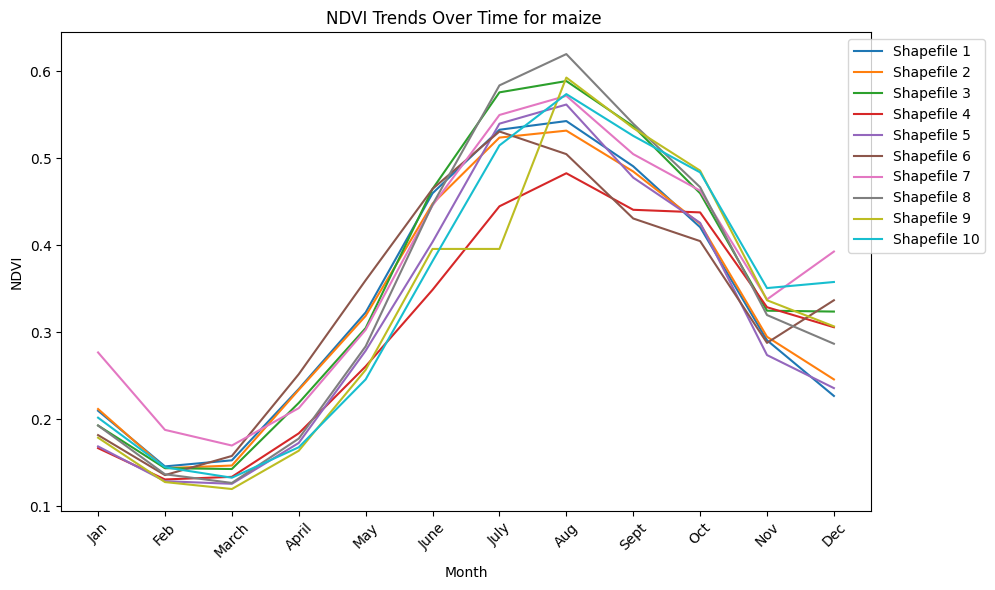

In [ ]:
#visualizing ten shapefiles
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
for i in range(subsets_maize.shape[0]):
    plt.plot(months, maize2.iloc[i], label=f'Shapefile {i+1}')


plt.xlabel('Month')
plt.ylabel('NDVI')
plt.title('NDVI Trends Over Time for maize ')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

In [ ]:
subsets_maize2 = maize2.iloc[0:90]
subsets_maize2.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.210,0.146,0.153,0.235,0.323,0.460,0.533,0.543,0.491,0.421,0.291,0.227
1,0.212,0.144,0.147,0.234,0.319,0.448,0.524,0.532,0.485,0.425,0.295,0.246
2,0.193,0.144,0.143,0.219,0.305,0.465,0.576,0.589,0.537,0.460,0.325,0.324
3,0.167,0.131,0.134,0.184,0.261,0.349,0.445,0.483,0.441,0.438,0.329,0.306
4,0.169,0.129,0.126,0.173,0.279,0.404,0.540,0.562,0.478,0.426,0.274,0.236


In [ ]:
subsets_maize2.shape

(90, 12)

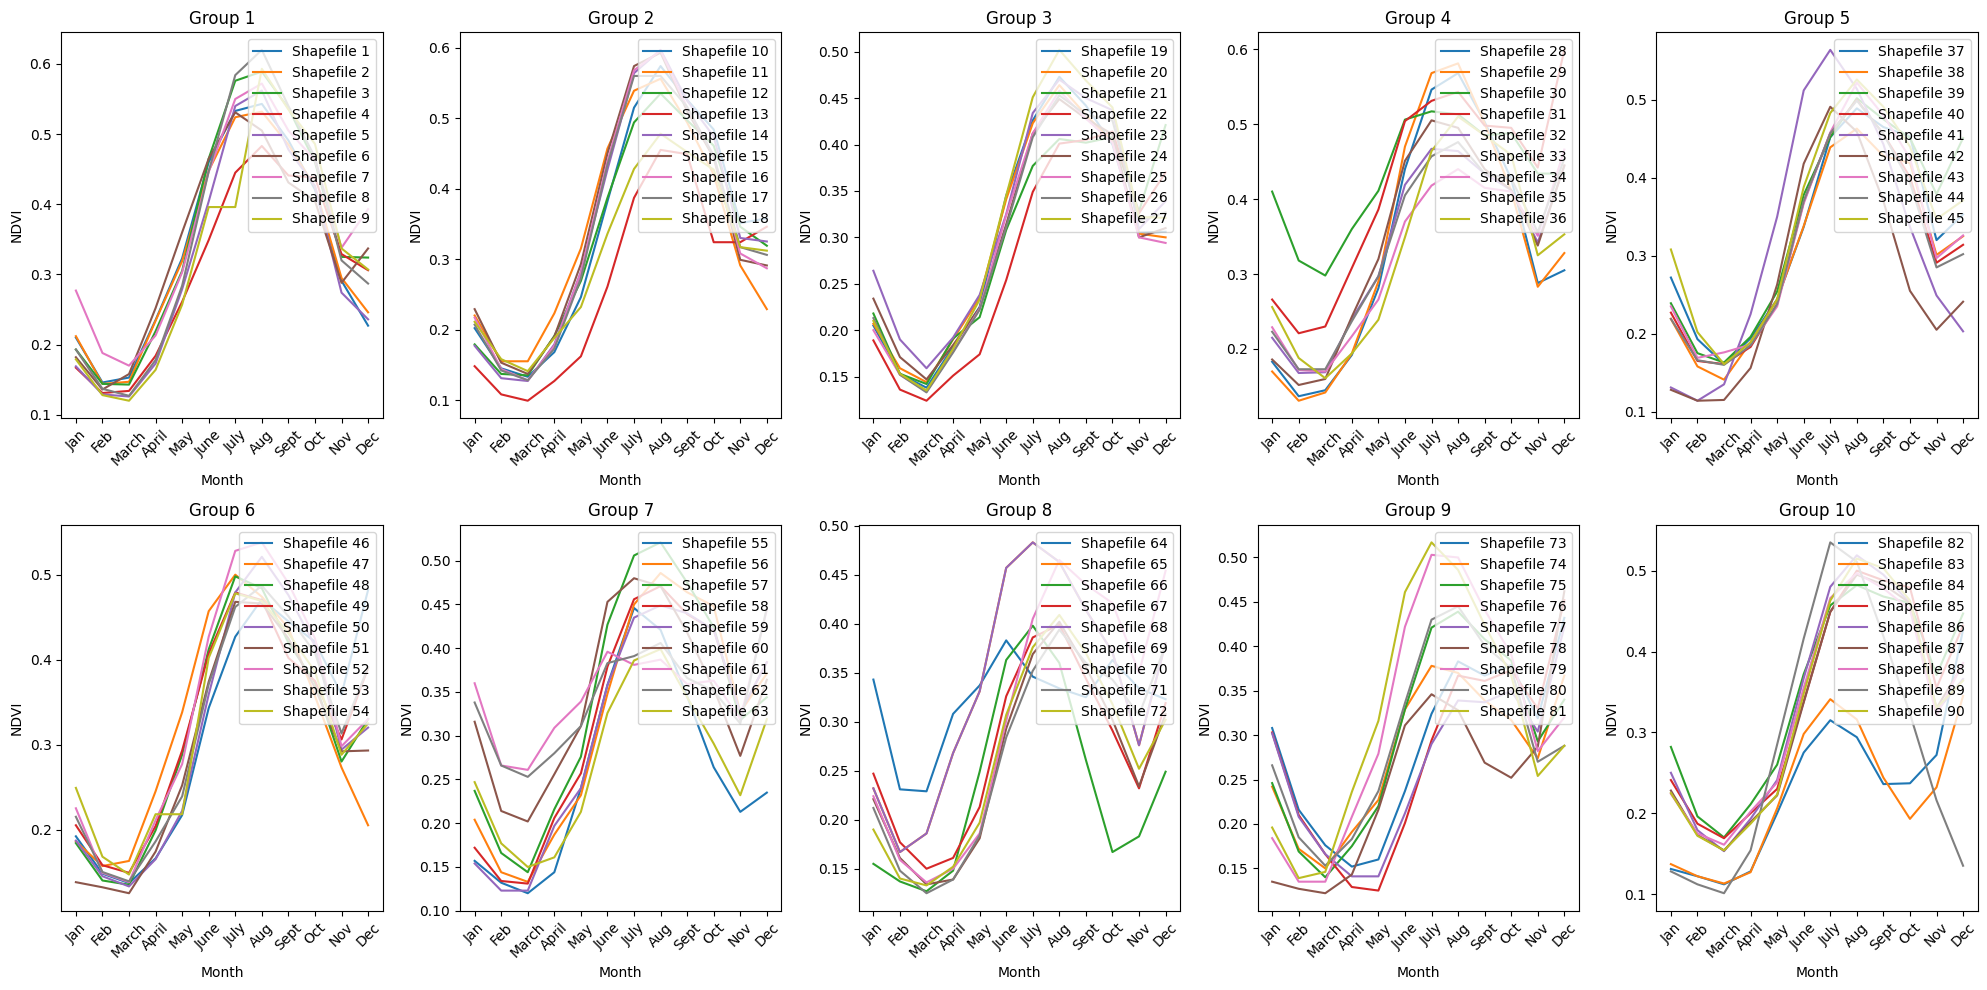

In [ ]:
#visualizing  the entire data
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.ravel()
shapefiles_per_subplot = 9
total_shapefiles = 90

assert len(months) == 12, "The 'months' list must contain 12 elements."

for i in range(10):
    start_idx = i * shapefiles_per_subplot
    end_idx = min(start_idx + shapefiles_per_subplot, total_shapefiles)

    for j in range(start_idx, end_idx):
        axs[i].plot(months, subsets_maize2.iloc[j], label=f'Shapefile {j+1}')

    axs[i].set_title(f'Group {i+1}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('NDVI')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(loc='upper right')

plt.tight_layout()
plt.show()


# **Coffee farms**

In [ ]:
#loading the coffee data
coffee_f2=pd.read_excel("/content/Coffee2_Farms.xlsx")
coffee_f2.head(15)

,Shapefiles,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Label,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,GF1,0.588,0.517,0.439,0.352,0.244,0.189,0.174,0.190,0.304,0.387,0.461,0.628,1.0,NaN,NaN,NaN
1,GF6,0.606,0.507,0.434,0.340,0.236,0.179,0.164,0.185,0.294,0.373,0.455,0.609,1.0,NaN,NaN,NaN
2,GF7,0.537,0.448,0.369,0.301,0.207,0.156,0.162,0.184,0.284,0.334,0.397,0.427,1.0,NaN,NaN,NaN
3,GF8,0.489,0.416,0.358,0.290,0.198,0.148,0.137,0.143,0.223,0.299,0.364,0.537,1.0,NaN,NaN,NaN
4,GF9,0.519,0.436,0.378,0.310,0.218,0.163,0.149,0.160,0.254,0.323,0.391,0.523,1.0,NaN,NaN,NaN
5,GF10,0.664,0.561,0.486,0.392,0.266,0.202,0.190,0.188,0.282,0.373,0.452,0.676,1.0,NaN,NaN,NaN
6,viewF21,0.777,0.585,0.485,0.444,0.331,0.251,0.213,0.210,0.321,0.418,0.421,0.513,1.0,NaN,NaN,NaN
7,viewF22,0.731,0.572,0.472,0.438,0.317,0.234,0.202,0.209,0.316,0.416,0.468,0.585,1.0,NaN,NaN,NaN
8,GF5,0.541,0.442,0.360,0.296,0.202,0.158,0.173,0.188,0.292,0.352,0.408,0.488,1.0,NaN,NaN,NaN
9,GF2,0.579,0.476,0.410,0.330,0.232,0.180,0.165,0.169,0.277,0.353,0.426,0.587,1.0,NaN,NaN,NaN


In [ ]:
coffee_f2 = coffee_f2.loc[:, ~coffee_f2.columns.str.contains('^Unnamed')]
coffee_f2.head(15)


,Shapefiles,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Label
0,GF1,0.588,0.517,0.439,0.352,0.244,0.189,0.174,0.190,0.304,0.387,0.461,0.628,1.0
1,GF6,0.606,0.507,0.434,0.340,0.236,0.179,0.164,0.185,0.294,0.373,0.455,0.609,1.0
2,GF7,0.537,0.448,0.369,0.301,0.207,0.156,0.162,0.184,0.284,0.334,0.397,0.427,1.0
3,GF8,0.489,0.416,0.358,0.290,0.198,0.148,0.137,0.143,0.223,0.299,0.364,0.537,1.0
4,GF9,0.519,0.436,0.378,0.310,0.218,0.163,0.149,0.160,0.254,0.323,0.391,0.523,1.0
5,GF10,0.664,0.561,0.486,0.392,0.266,0.202,0.190,0.188,0.282,0.373,0.452,0.676,1.0
6,viewF21,0.777,0.585,0.485,0.444,0.331,0.251,0.213,0.210,0.321,0.418,0.421,0.513,1.0
7,viewF22,0.731,0.572,0.472,0.438,0.317,0.234,0.202,0.209,0.316,0.416,0.468,0.585,1.0
8,GF5,0.541,0.442,0.360,0.296,0.202,0.158,0.173,0.188,0.292,0.352,0.408,0.488,1.0
9,GF2,0.579,0.476,0.410,0.330,0.232,0.180,0.165,0.169,0.277,0.353,0.426,0.587,1.0


In [ ]:
#removing the label and the shapefile column
coffee2 = coffee_f2.iloc[:, 1:-1]
coffee2.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.588,0.517,0.439,0.352,0.244,0.189,0.174,0.190,0.304,0.387,0.461,0.628
1,0.606,0.507,0.434,0.340,0.236,0.179,0.164,0.185,0.294,0.373,0.455,0.609
2,0.537,0.448,0.369,0.301,0.207,0.156,0.162,0.184,0.284,0.334,0.397,0.427
3,0.489,0.416,0.358,0.290,0.198,0.148,0.137,0.143,0.223,0.299,0.364,0.537
4,0.519,0.436,0.378,0.310,0.218,0.163,0.149,0.160,0.254,0.323,0.391,0.523


In [ ]:
subsets_coffee2 = coffee2.iloc[1:10]
subsets_coffee2

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
1,0.606,0.507,0.434,0.340,0.236,0.179,0.164,0.185,0.294,0.373,0.455,0.609
2,0.537,0.448,0.369,0.301,0.207,0.156,0.162,0.184,0.284,0.334,0.397,0.427
3,0.489,0.416,0.358,0.290,0.198,0.148,0.137,0.143,0.223,0.299,0.364,0.537
4,0.519,0.436,0.378,0.310,0.218,0.163,0.149,0.160,0.254,0.323,0.391,0.523
5,0.664,0.561,0.486,0.392,0.266,0.202,0.190,0.188,0.282,0.373,0.452,0.676
6,0.777,0.585,0.485,0.444,0.331,0.251,0.213,0.210,0.321,0.418,0.421,0.513
7,0.731,0.572,0.472,0.438,0.317,0.234,0.202,0.209,0.316,0.416,0.468,0.585
8,0.541,0.442,0.360,0.296,0.202,0.158,0.173,0.188,0.292,0.352,0.408,0.488
9,0.579,0.476,0.410,0.330,0.232,0.180,0.165,0.169,0.277,0.353,0.426,0.587


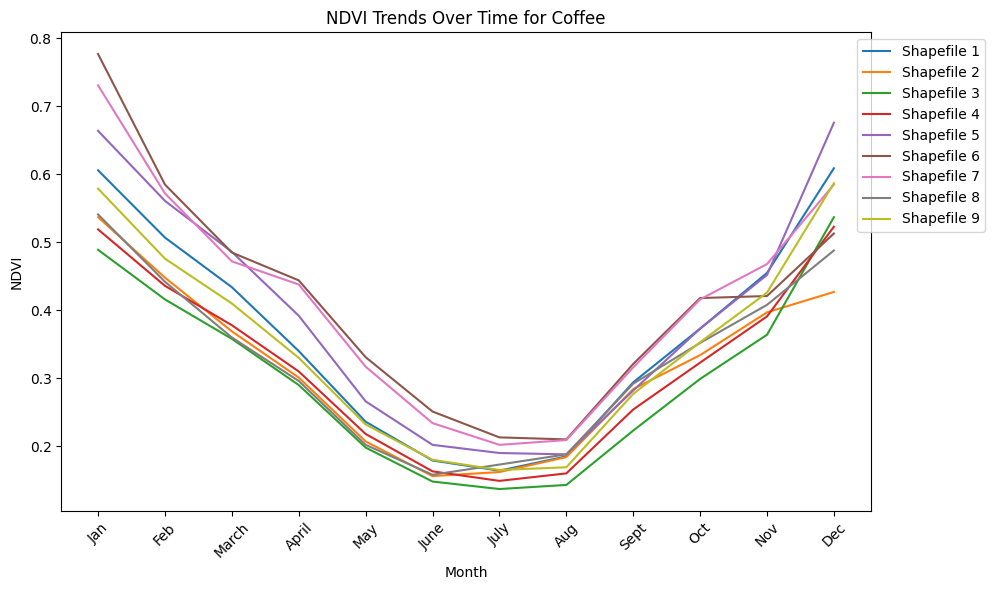

In [ ]:
#getting the Ndvi trend for the coffee data using subsetof 10 datapoints
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']
plt.figure(figsize=(10, 6))
for i in range(subsets_coffee2.shape[0]):
    plt.plot(months, subsets_coffee2.iloc[i], label=f'Shapefile {i+1}')


plt.xlabel('Month')
plt.ylabel('NDVI')
plt.title('NDVI Trends Over Time for Each Shapefile')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.xticks(rotation=45)
plt.tight_layout()


plt.show()

In [ ]:
subset_coffee2 = coffee2.iloc[0:90]
subset_coffee2

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.588,0.517,0.439,0.352,0.244,0.189,0.174,0.190,0.304,0.387,0.461,0.628
1,0.606,0.507,0.434,0.340,0.236,0.179,0.164,0.185,0.294,0.373,0.455,0.609
2,0.537,0.448,0.369,0.301,0.207,0.156,0.162,0.184,0.284,0.334,0.397,0.427
3,0.489,0.416,0.358,0.290,0.198,0.148,0.137,0.143,0.223,0.299,0.364,0.537
4,0.519,0.436,0.378,0.310,0.218,0.163,0.149,0.160,0.254,0.323,0.391,0.523
...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.433,0.319,0.251,0.230,0.166,0.148,0.139,0.122,0.184,0.238,0.275,0.267
86,0.459,0.296,0.248,0.241,0.172,0.162,0.174,0.154,0.224,0.284,0.321,0.328
87,0.405,0.255,0.216,0.213,0.153,0.136,0.151,0.149,0.217,0.275,0.315,0.312
88,0.445,0.314,0.251,0.229,0.160,0.138,0.163,0.166,0.242,0.300,0.351,0.348


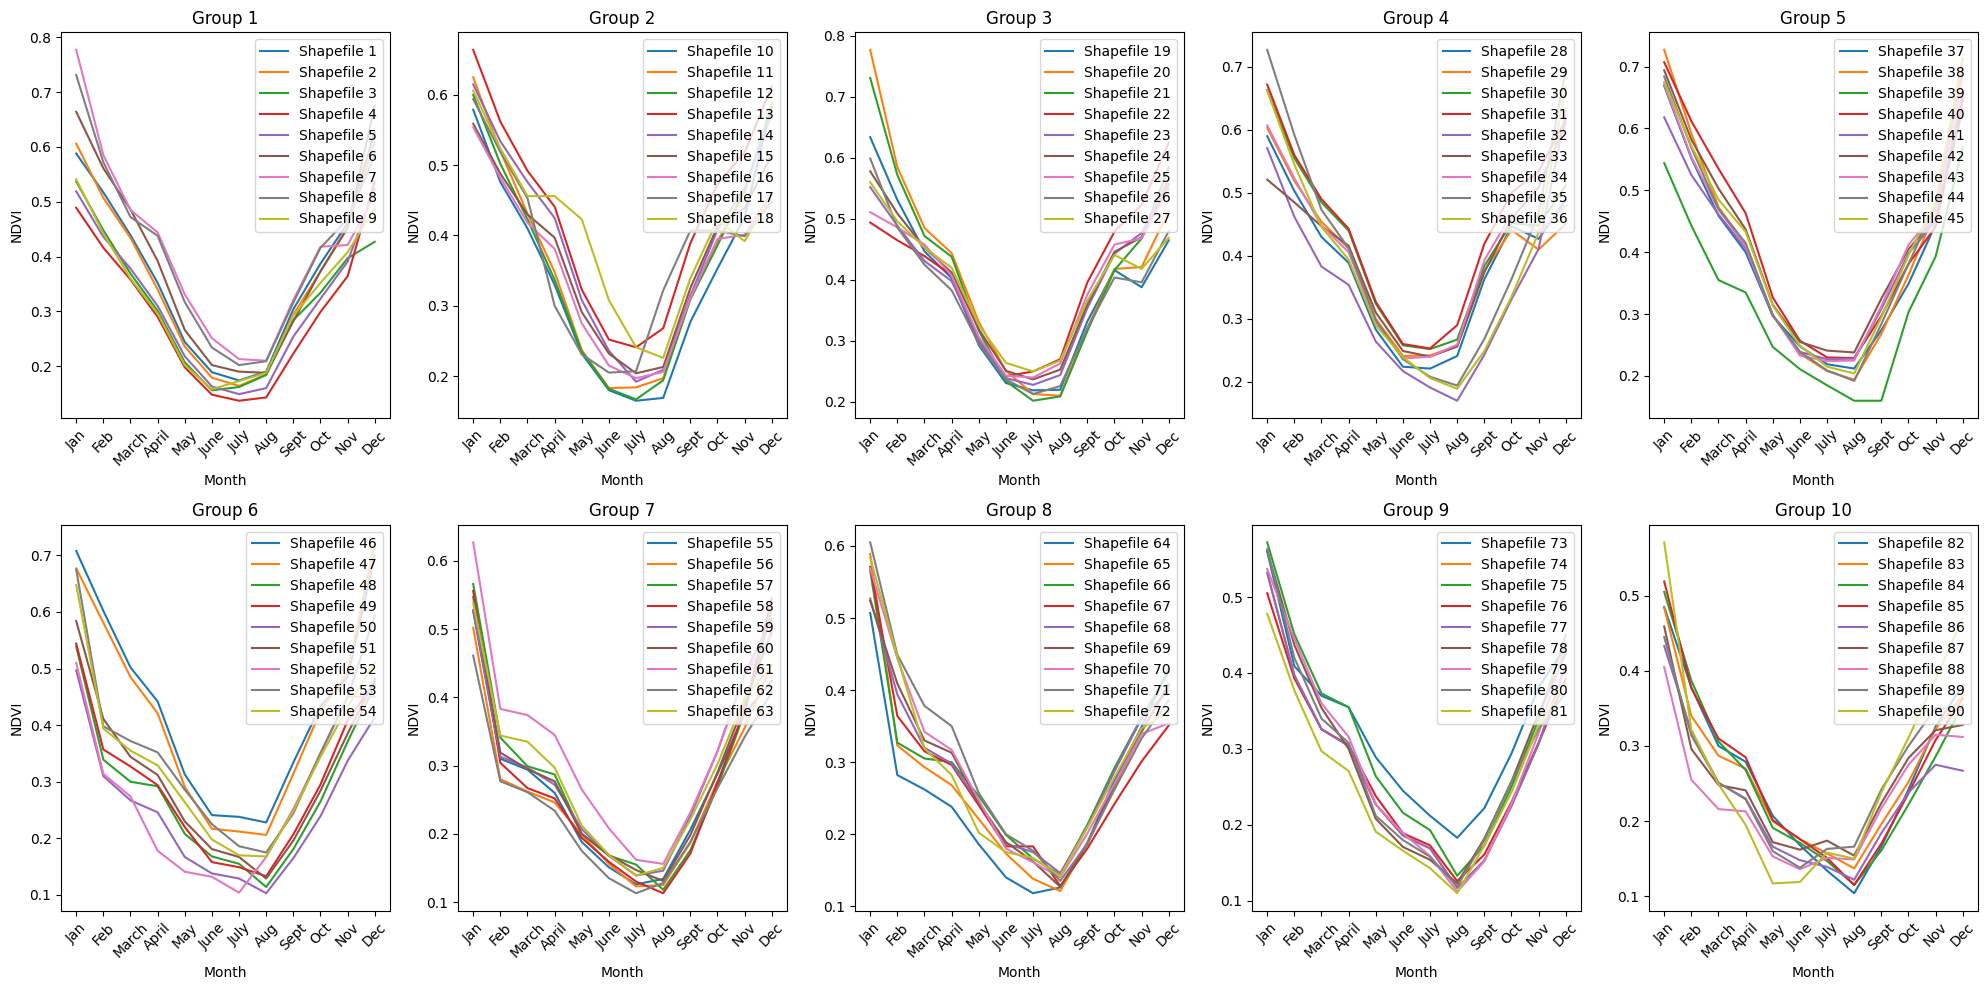

In [ ]:
#Creating a subplot of the entire  coffee data
fig, axs = plt.subplots(2, 5, figsize=(20, 10))
axs = axs.ravel()

shapefiles_per_subplot = 9


total_shapefiles = 90
for i in range(10):
    start_idx = i * shapefiles_per_subplot
    end_idx = min(start_idx + shapefiles_per_subplot, total_shapefiles)
    for j in range(start_idx, end_idx):
        axs[i].plot(months, subset_coffee2.iloc[j], label=f'Shapefile {j+1}')

    axs[i].set_title(f'Group {i+1}')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('NDVI')
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].legend(loc='upper right')

#prevent overlap using layout function
plt.tight_layout()
plt.show()


# **DBSCAN clustering**

In [6]:
#combined dataset for maize and coffee
df = data.iloc[:, 1:-1]
df.head()

,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec
0,0.221,0.161,0.134,0.139,0.181,0.293,0.369,0.402,0.356,0.302,0.234,0.308
1,0.224,0.159,0.136,0.150,0.186,0.301,0.405,0.465,0.440,0.421,0.350,0.454
2,0.212,0.148,0.125,0.139,0.184,0.284,0.352,0.394,0.360,0.343,0.307,0.378
3,0.190,0.140,0.133,0.152,0.197,0.307,0.376,0.409,0.370,0.318,0.252,0.302
4,0.308,0.216,0.176,0.152,0.160,0.237,0.324,0.383,0.367,0.379,0.319,0.432


In [7]:

#applying the DBSCAN algorithm
dbscan_cluster=DBSCAN(eps=0.2,min_samples=15).fit(df)
dbscan_cluster

DBSCAN(eps=0.2, min_samples=15)

In [8]:
labels=dbscan_cluster.labels_

In [9]:
data['clusters']=dbscan_cluster.labels_
data.head()

,Shapefiles,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Label,clusters
0,sabania11,0.221,0.161,0.134,0.139,0.181,0.293,0.369,0.402,0.356,0.302,0.234,0.308,0,0
1,sabania12,0.224,0.159,0.136,0.150,0.186,0.301,0.405,0.465,0.440,0.421,0.350,0.454,0,0
2,sabania9,0.212,0.148,0.125,0.139,0.184,0.284,0.352,0.394,0.360,0.343,0.307,0.378,0,0
3,sabania10,0.190,0.140,0.133,0.152,0.197,0.307,0.376,0.409,0.370,0.318,0.252,0.302,0,0
4,sabania7,0.308,0.216,0.176,0.152,0.160,0.237,0.324,0.383,0.367,0.379,0.319,0.432,0,0


In [10]:
data['clusters']=dbscan_cluster.labels_
data

,Shapefiles,Jan,Feb,March,April,May,June,July,Aug,Sept,Oct,Nov,Dec,Label,clusters
0,sabania11,0.221,0.161,0.134,0.139,0.181,0.293,0.369,0.402,0.356,0.302,0.234,0.308,0,0
1,sabania12,0.224,0.159,0.136,0.150,0.186,0.301,0.405,0.465,0.440,0.421,0.350,0.454,0,0
2,sabania9,0.212,0.148,0.125,0.139,0.184,0.284,0.352,0.394,0.360,0.343,0.307,0.378,0,0
3,sabania10,0.190,0.140,0.133,0.152,0.197,0.307,0.376,0.409,0.370,0.318,0.252,0.302,0,0
4,sabania7,0.308,0.216,0.176,0.152,0.160,0.237,0.324,0.383,0.367,0.379,0.319,0.432,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
184,sabania68,0.179,0.128,0.120,0.164,0.257,0.396,0.396,0.593,0.535,0.486,0.337,0.307,0,0
185,sabania69,0.202,0.145,0.133,0.168,0.246,0.382,0.515,0.574,0.526,0.484,0.351,0.358,0,0
186,sabania70,0.220,0.155,0.155,0.223,0.315,0.457,0.539,0.556,0.494,0.420,0.291,0.229,0,0
187,sabania71,0.179,0.137,0.135,0.191,0.269,0.387,0.494,0.535,0.497,0.461,0.346,0.319,0,0


In [ ]:
data['clusters'].value_counts()

,count
clusters,
1,93
0,87
-1,9


In [11]:
#getting the number of clusters
valid_clusters = sorted(data['clusters'].unique())
print(f"Unique clusters: {valid_clusters}")
print(f"Total number of clusters: {len(valid_clusters)}")


Unique clusters: [-1, 0, 1]
Total number of clusters: 3


In [12]:
#getting the percentage of the  noise/outliers in  data
n_noise = np.sum(dbscan_cluster.labels_ == -1)
total_points = len(dbscan_cluster.labels_)
noise_percentage = (n_noise / total_points) * 100

print(f'Number of Noise Points: {n_noise} ({noise_percentage:.2f}% of total points)')

Number of Noise Points: 9 (4.76% of total points)


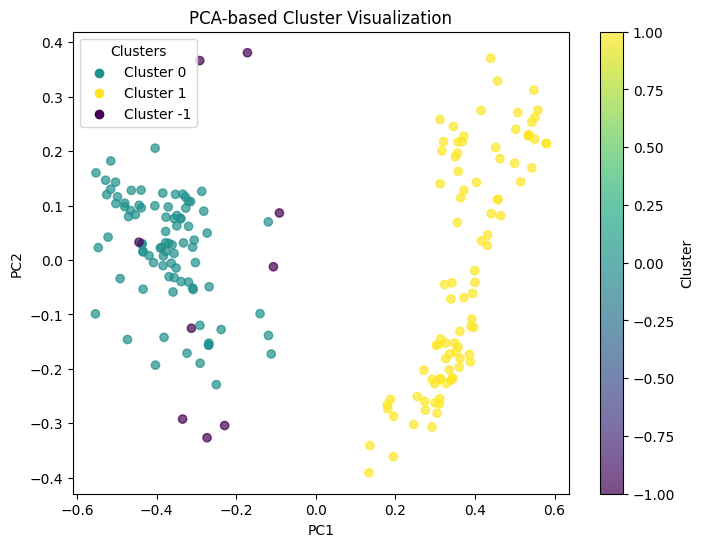

In [13]:
# Apply PCA to reduce data to 2 dimensions
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(df)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=labels, cmap='viridis', alpha=0.7)
plt.colorbar(scatter, label='Cluster')
unique_labels = set(labels)
for label in unique_labels:
    plt.scatter([], [], c=scatter.cmap(scatter.norm(label)), label=f'Cluster {label}')
plt.legend(title='Clusters', loc='best')
plt.title('PCA-based Cluster Visualization')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
